In [1]:
from body_matrix import load, infer, process, draw

keypoints_model, keypoints_transform = load.keypoints_model("cpu")
video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Raw_Vids/VID_20230109_154951~2.mp4", 
    -90, 
    40
)

There are 2 Western girls crossing the street, one dude standing next to his motorcycle, 2 dudes standing far away near Lottee, one dude in black suit standing near Lottee mart door and one dude taking picture of Lotte Center. There are one chritmas tree on the right, and two other tree on the left. Big Lottee sign near the sidewalk and on the building

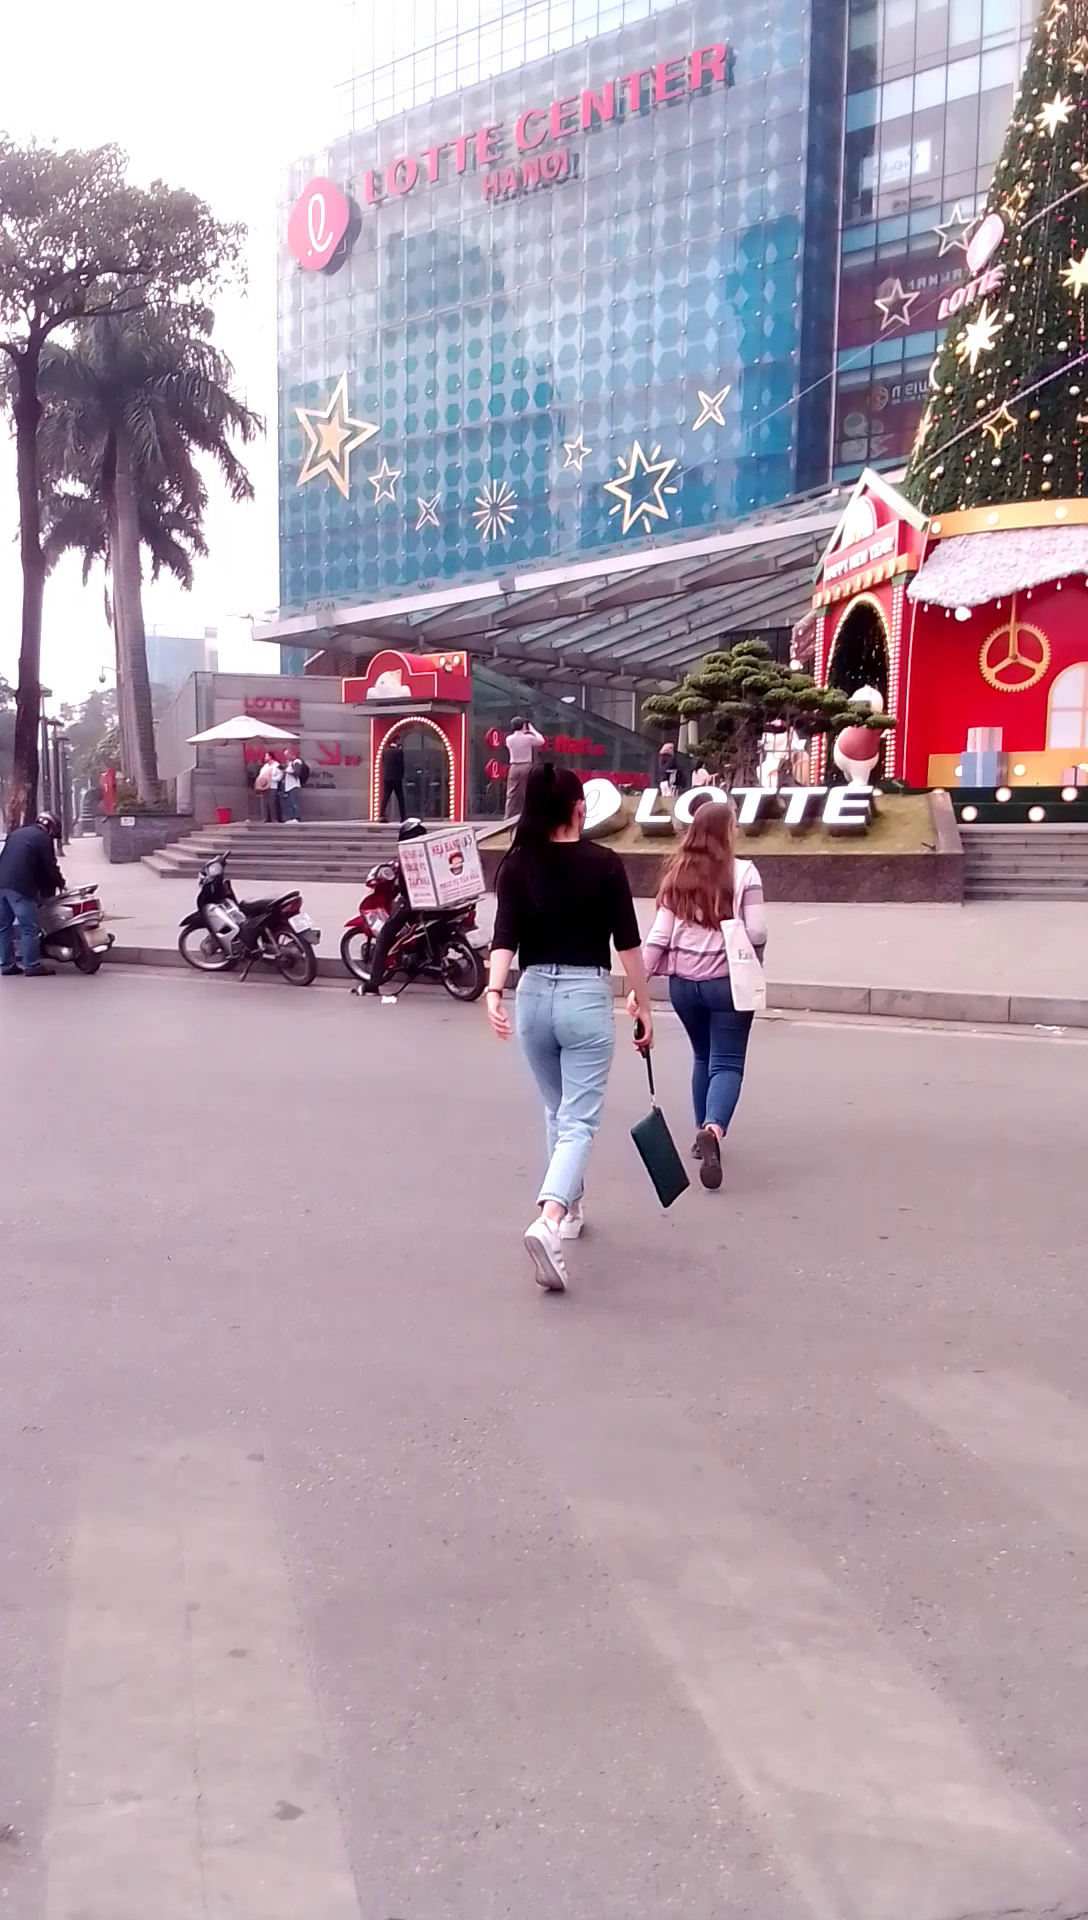

In [2]:
sample_frame

In [54]:
from PIL import Image
import numpy as np

np_image = np.array(sample_frame)
print(type(np_image))

<class 'numpy.ndarray'>


In [55]:
np_image.dtype

dtype('uint8')

In [56]:
np_image.shape

(1920, 1088, 3)

In [57]:
gray_scale = sample_frame.convert("L")
np.array(gray_scale).shape

(1920, 1088)

In [58]:
gray_scale.save('grayscale.png')

In [59]:
np_image.flags.writeable

True

In [60]:
R, G, B = np_image[1000, 600]

In [61]:
print(R,G,B)

151 164 192


In [71]:
## ASSIGNING Green and Blue channel to 0
img_R = np_image.copy()
img_R[:,:,(1,2)] = 0
R_image = Image.fromarray(img_R)
R_image.save("red.png")

In [70]:
## ASSIGNING Red and Blue channel to 0
img_G = np_image.copy()
img_G[:,:,(0,2)] = 0
G_image = Image.fromarray(img_G)
G_image.save("green.png")

In [67]:
## ASSIGNING Red and Green channel to 0
img_B = np_image.copy()
img_B[:,:,(0,1)] = 0
B_image = Image.fromarray(img_B)
B_image.save("blue.png")

In [69]:
inverse_np = 255 - np_image
inverse_image = Image.fromarray(inverse_np)
inverse_image.save("inverse.png")

In [87]:
def pixelate(image, scale_ratio):
    width = image.width
    height = image.height
    scale_down = image.resize(
        (int(width/scale_ratio),int(height/scale_ratio))
    )
    
    pixelated = scale_down.resize((width, height))
    return pixelated
    

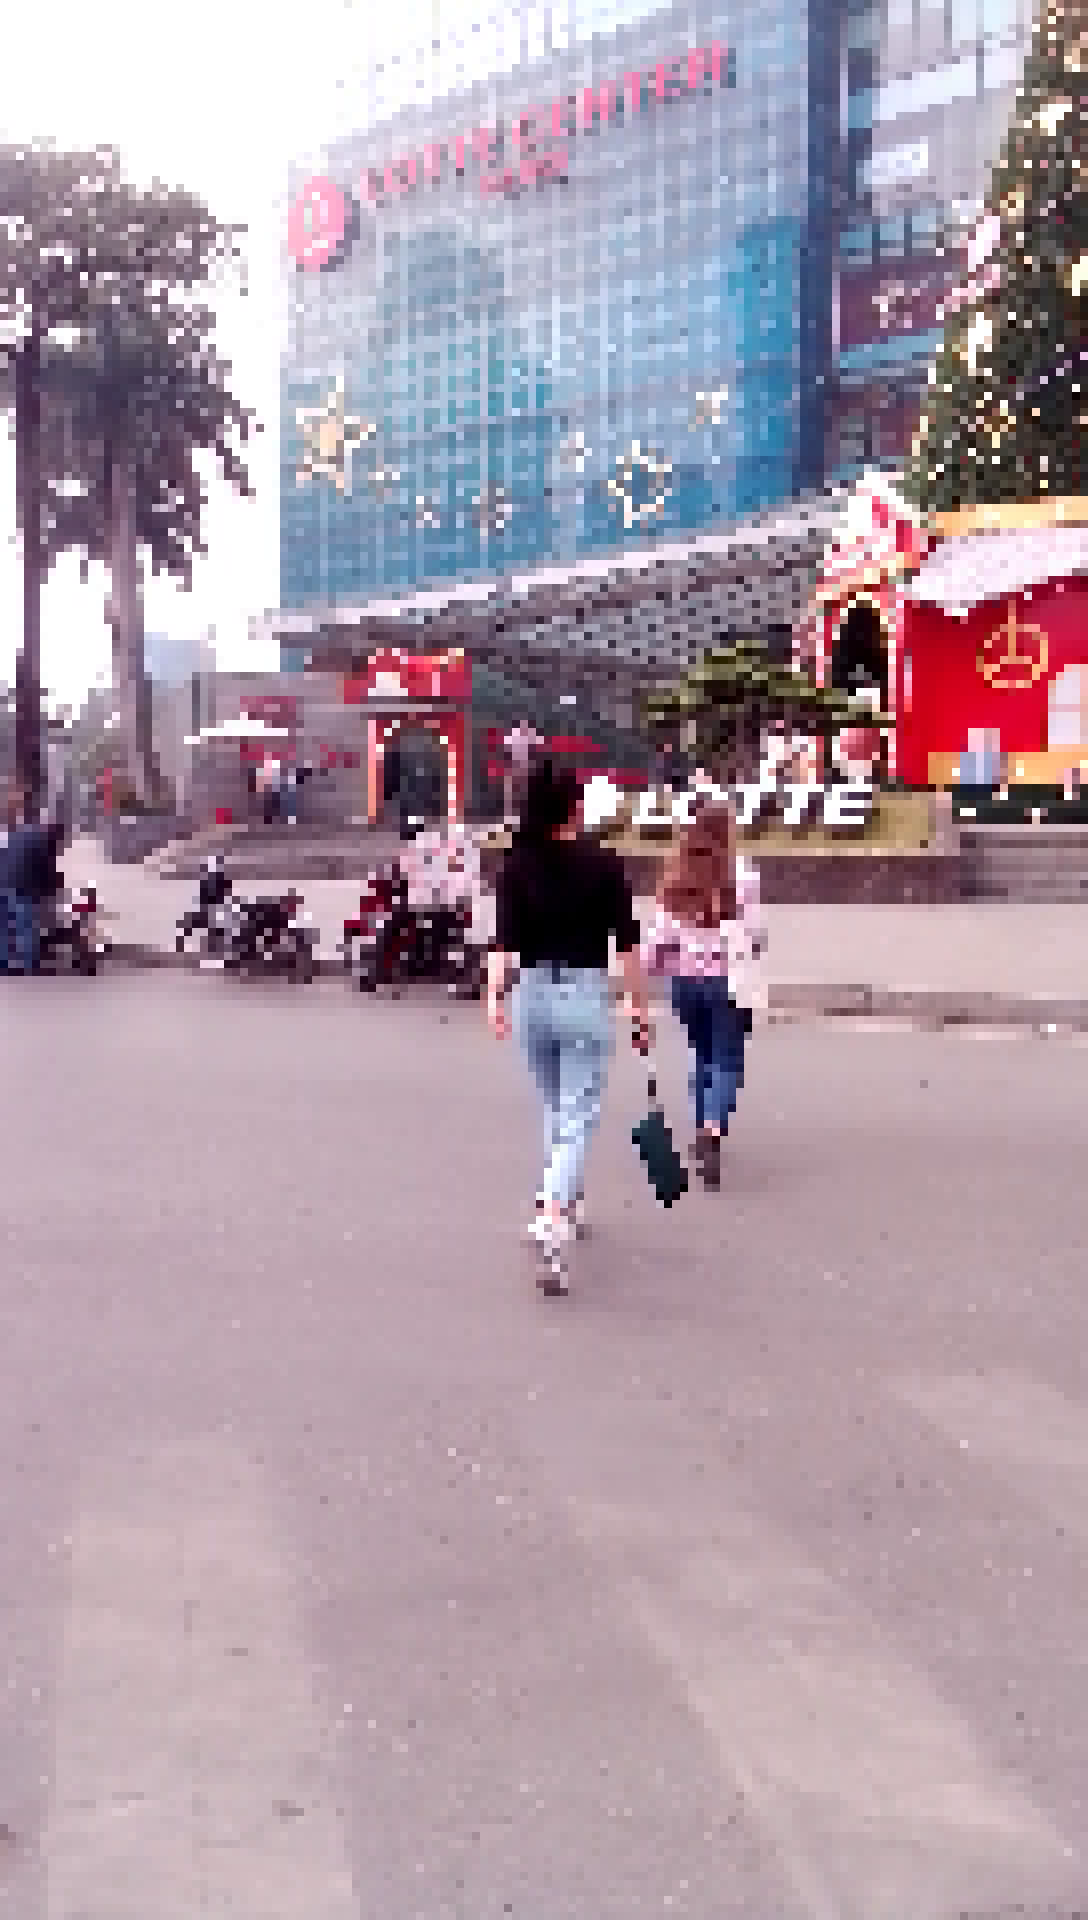

In [95]:
pixelate(sample_frame, 8)

In [86]:
from body_matrix import load, infer, process

selected_box, keypoints = infer.detect_main_target(
    sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
    sample_frame, "cpu", selected_box, 
    0.99, segment_model, segment_transform
)

outside_segmentation_positions = process.outside_segmentation_area(
    sample_image=sample_frame, 
    bool_mask=bool_mask
)

Found  9  person in the frame
Distances:  [22.62548828125, 162.87408447265625, 509.7685966491699, 21.328018188476562, 277.08660888671875, 251.41407775878906, 150.89122009277344, 47.89398193359375, 157.73812866210938]
Areas:  [85893.29776924103, 53805.958535805345, 11687.49616825534, 4007.4995117206126, 2025.9671002328396, 1678.8271613456309, 2405.1815660856664, 2410.0547087341547, 495.1052218005061]
FOCUSES:  [3796.306921712792, 330.3530988985448, 22.92706189647622, 187.89835400111613, 7.311674527949184, 6.677538411179688, 15.939837749385768, 50.320616733763295, 3.1387796089623348]
Select keypoint index 0
Found  6  person in the frame
[0.8962397575378418, 808.0972290039062, 65.64437103271484, 976.2938842773438]
[483.73626708984375, 763.2023315429688, 649.5147094726562, 1281.3233642578125]
[486.70794677734375, 763.4951782226562, 655.180419921875, 1283.17626953125]
[483.73626708984375, 763.2023315429688, 649.5147094726562, 1281.3233642578125]
[641.110107421875, 784.1318969726562, 771.313